In [29]:
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [46]:
Transform = transforms.ToTensor()
train = datasets.MNIST(root='../DATA',train = True, download = True, transform = Transform)
test = datasets.MNIST(root='../DATA',train = False, download = True, transform = Transform)

Shape: torch.Size([1, 28, 28]) 
Label: 5


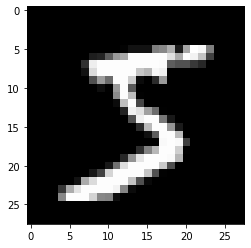

In [31]:
image, label = train[0]
print('Shape:',image.shape,'\nLabel:',label)
plt.imshow(image.reshape((28,28)),cmap='gray')

In [32]:
train_loader = DataLoader (train, batch_size = 64, shuffle=True)
test_loader = DataLoader (test, batch_size = 10000, shuffle=False)

In [33]:
class MLP(nn.Module):
     def __init__(self, input_size = 784, hidden_layers = [500,250,100], num_classes = 10):
         super().__init__()
         self.d1 = nn.Linear(input_size,hidden_layers[0])
         self.d2 = nn.Linear(hidden_layers[0],hidden_layers[1])
         self.d3 = nn.Linear(hidden_layers[1],hidden_layers[2])
         self.d4 = nn.Linear(hidden_layers[2],num_classes)
     def forward(self, X):
         X = F.relu(self.d1(X))
         X = F.relu(self.d2(X)) 
         X = F.relu(self.d3(X))
         X = self.d4(X) 
         return F.log_softmax(X,dim=1)

In [34]:
model = MLP()
print(model)

MLP(
  (d1): Linear(in_features=784, out_features=500, bias=True)
  (d2): Linear(in_features=500, out_features=250, bias=True)
  (d3): Linear(in_features=250, out_features=100, bias=True)
  (d4): Linear(in_features=100, out_features=10, bias=True)
)


In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [36]:
for images, labels in train_loader:
  print('Initial Batch shape: ', images.size())
  break
print('Batch shape after flattening', images.view(64,-1).size())

Initial Batch shape:  torch.Size([64, 1, 28, 28])
Batch shape after flattening torch.Size([64, 784])


In [37]:
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(15):
  train_corr = 0
  test_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1

    #Apply model
    X_train = X_train.reshape(X_train.shape[0], -1)
    y_pred = model(X_train.view(-1,28*28))
    loss = criterion(y_pred, y_train)

    #Calculate #correct predictions
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    train_corr +=batch_corr

    #Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if b%200==0:
      train_loss.append(loss)
    train_correct.append(train_corr)

    #Run testing
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
       #Apply model
       y_val = model(X_test.view(10000,-1))

       #Compute correct predictions
       predicted = torch.max(y_val.data,1)[1]
       test_corr += (predicted == y_test).sum()
       #Update test loss and accuracy for each epoch
       loss = criterion(y_val, y_test)
       if b%100==0:
         test_loss.append(loss)
       test_correct.append(test_corr)

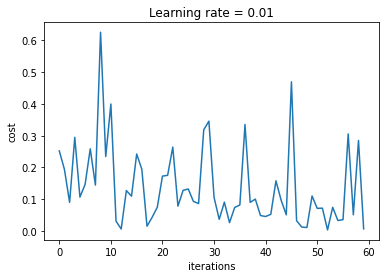

In [38]:
losses= [loss.detach().numpy() for loss in train_loss]
plt.plot(losses)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01")
plt.show()

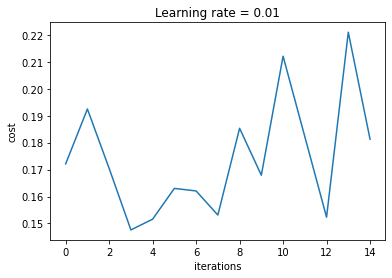

In [39]:
losses= [loss.detach().numpy() for loss in test_loss]
plt.plot(losses)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01")
plt.show()

In [40]:
(X_test, y_test) in (test_loader)
y_val = model(X_test.view(10000,-1))
predicted = torch.max(y_val.data,1)[1]
test_corr = (predicted == y_test).sum()
loss = criterion(y_val, y_test)

In [41]:
print(loss)

tensor(0.1813, grad_fn=<NllLossBackward0>)


In [44]:
print((test_corr.detach().numpy())/10000)

0.9705
